In [1]:
import pandas as pd
import os
import numpy as np
import chardet
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
pwd = os.getcwd()

In [3]:
dataset = pd.read_excel(pwd + "\\YouTube Raw Data.xlsx")
dataset

,ID,Title,Publishing Date,Views,Likes,Comments
0,mMJkStbiqq8,From HUMAN To SISSY Story In Minecraft!,2021-12-19T20:18:54Z,127601,6811,857
1,a6-pVFStIRg,Minecraft but Everything I touch turns to Bedrock,2021-12-19T15:00:00Z,888957,29290,2082
2,vnqVV8ZMx0o,Minecraft wait what meme part 56 realistic min...,2021-12-19T05:26:04Z,49778,928,30
3,5dQOB46-PYQ,This IS THE BEST MULTI PICKAXE FOR MINING in M...,2021-12-19T10:19:56Z,39928,690,35
4,hCzn-Rt2s0E,Testing a Real Life Simulator in Minecraft,2021-12-18T23:00:32Z,181213,9451,1094
5,xrhzQul1_gY,НУБ НАШЕЛ ДЕРЕВНЮ РОБОТОВ В МАЙНКРАФТ ! НУБИК...,2021-12-19T10:00:19Z,194680,6653,521
6,bqZkpjtxArU,Minecraft But I Have VIDEO GAME Hearts!,2021-12-18T15:15:05Z,1972364,41702,3251
7,Lm0nYDdsdmk,I Built a Fairy Village in Minecraft 1.18 - Su...,2021-12-19T15:53:24Z,72313,9385,781
8,nCoi_OtPU7U,Minecraft if it was played WRONG,2021-12-19T20:00:19Z,23853,2008,289
9,t1Xsi50chXg,This ESCAPE ROOM is 99.9% IMPOSSIBLE! (Minecraft),2021-12-19T13:19:33Z,176593,12835,966


In [4]:
dataset_modified = dataset.copy()
dataset_modified

,ID,Title,Publishing Date,Views,Likes,Comments
0,mMJkStbiqq8,From HUMAN To SISSY Story In Minecraft!,2021-12-19T20:18:54Z,127601,6811,857
1,a6-pVFStIRg,Minecraft but Everything I touch turns to Bedrock,2021-12-19T15:00:00Z,888957,29290,2082
2,vnqVV8ZMx0o,Minecraft wait what meme part 56 realistic min...,2021-12-19T05:26:04Z,49778,928,30
3,5dQOB46-PYQ,This IS THE BEST MULTI PICKAXE FOR MINING in M...,2021-12-19T10:19:56Z,39928,690,35
4,hCzn-Rt2s0E,Testing a Real Life Simulator in Minecraft,2021-12-18T23:00:32Z,181213,9451,1094
5,xrhzQul1_gY,НУБ НАШЕЛ ДЕРЕВНЮ РОБОТОВ В МАЙНКРАФТ ! НУБИК...,2021-12-19T10:00:19Z,194680,6653,521
6,bqZkpjtxArU,Minecraft But I Have VIDEO GAME Hearts!,2021-12-18T15:15:05Z,1972364,41702,3251
7,Lm0nYDdsdmk,I Built a Fairy Village in Minecraft 1.18 - Su...,2021-12-19T15:53:24Z,72313,9385,781
8,nCoi_OtPU7U,Minecraft if it was played WRONG,2021-12-19T20:00:19Z,23853,2008,289
9,t1Xsi50chXg,This ESCAPE ROOM is 99.9% IMPOSSIBLE! (Minecraft),2021-12-19T13:19:33Z,176593,12835,966


In [5]:
dataset_modified.columns

Index(['ID', 'Title', 'Publishing Date', 'Views', 'Likes', 'Comments'], dtype='object')

In [6]:
dataset_modified.dropna(inplace = True)

In [7]:
columns_to_drop = ["ID", "Title", "Publishing Date"]

In [8]:
dataset_modified_two = dataset_modified.drop(columns = columns_to_drop)

array([[<AxesSubplot:title={'center':'Views'}>,
        <AxesSubplot:title={'center':'Likes'}>],
       [<AxesSubplot:title={'center':'Comments'}>, <AxesSubplot:>]],
      dtype=object)

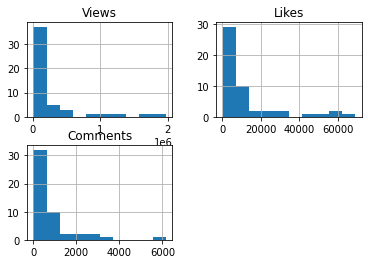

In [9]:
dataset_modified_two.hist()

In [10]:
""""
# normalize data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()
"""

'"\n# normalize data with boxcox\nnormalized_data = stats.boxcox(original_data)\n\n# plot both together to compare\nfig, ax=plt.subplots(1, 2, figsize=(15, 3))\nsns.histplot(original_data, ax=ax[0], kde=True, legend=False)\nax[0].set_title("Original Data")\nsns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)\nax[1].set_title("Normalized data")\nplt.show()\n'

<AxesSubplot:>

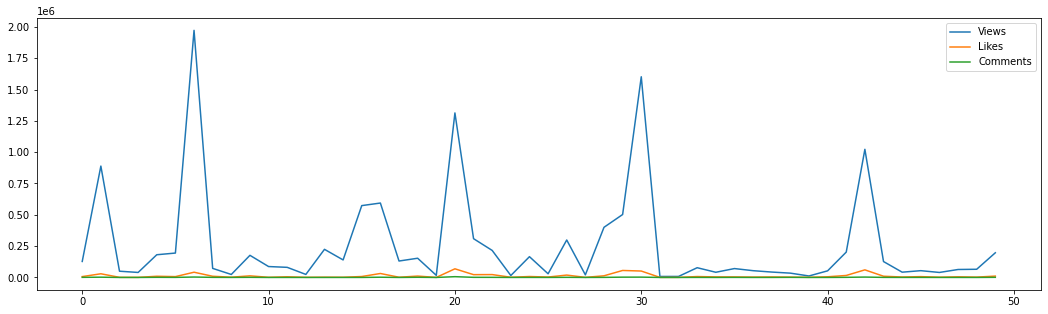

In [11]:
dataset_modified.plot(figsize = (18, 5))


array([[<AxesSubplot:title={'center':'Views'}>,
        <AxesSubplot:title={'center':'Likes'}>],
       [<AxesSubplot:title={'center':'Comments'}>, <AxesSubplot:>]],
      dtype=object)

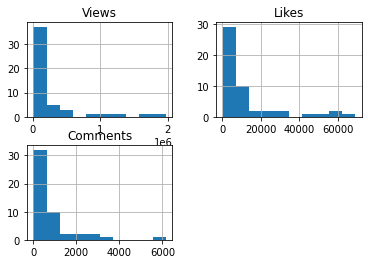

In [12]:
dataset_modified.hist()

In [13]:
# normalize data with boxcox
normalized_data, normalized_lambda = stats.boxcox(dataset_modified_two["Views"])


In [14]:
dataset_modified_three = dataset_modified_two.copy()

In [15]:
dataset_modified_three['Views_Normalized'] = normalized_data.tolist()

In [16]:
# Assign X and Y Variables
x = dataset_modified_three[["Likes", "Comments"]]
y = dataset_modified_three["Views_Normalized"]

In [17]:
# Split dataset into training and testing 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [18]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [19]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  7.236584457103083
Coefficients:


[('Likes', 1.4082004612374019e-05), ('Comments', 0.0003315167535929828)]

In [20]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 8.90159318  7.3056399   7.34483858  7.62909398  7.56241846  7.73095911
  7.50299226  7.47884135 10.24764408  9.0748198   7.61660685  7.36996151
  7.83999524  7.47218528  7.53921201]


In [21]:
# Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 43.41
Mean Absolute Error: 0.3106345026499765
Mean Square Error: 0.24836293482086966
Root Mean Square Error: 0.49836024602778023


In [22]:
dataset_modified_four = dataset_modified_three.copy()

In [23]:
dataset_modified_four.drop(columns = 'Views', inplace = True)

In [24]:
dataset_modified_four.rename(columns = {'Views_Normalized' : 'Views'}, inplace = True)

In [25]:
"""
# z score outlier removal
#find absolute value of z-score for each observation
z = np.abs(stats.zscore(dataset_modified_four))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
data_clean = dataset_modified_four[(z<3).all(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape
"""

'\n# z score outlier removal\n#find absolute value of z-score for each observation\nz = np.abs(stats.zscore(dataset_modified_four))\n\n#only keep rows in dataframe with all z-scores less than absolute value of 3 \ndata_clean = dataset_modified_four[(z<3).all(axis=1)]\n\n#find how many rows are left in the dataframe \ndata_clean.shape\n'

In [26]:
# use iqr to remove outliers

#find Q1, Q3, and interquartile range for each column
Q1 = dataset_modified_four.quantile(q=.25)
Q3 = dataset_modified_four.quantile(q=.75)
IQR = dataset_modified_four.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
dataset_modified_five = dataset_modified_four[~((dataset_modified_four < (Q1-1.5*IQR)) | (dataset_modified_four > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
dataset_modified_five.shape


(43, 3)

In [27]:
output = dataset_modified_five.copy()

In [28]:
output.to_excel(pwd + "\\Data2 - YoutubeData Cleaned.xlsx", index = False)